In [1]:
%pylab inline
import numpy as np

Populating the interactive namespace from numpy and matplotlib


In [2]:
!ls

analyze_double_well.ipynb	       doublewell_prod.plumed.dat
bck.0.double_well_-3_3.colvar.txt      fisst.plumed.dat
bck.0.double_well_-3_3.observable.txt  run_F-0.5
bck.0.double_well_-3_3.restart.txt     run_F-1.0
bck.1.double_well_-3_3.colvar.txt      run_F-2.5
bck.1.double_well_-3_3.restart.txt     run_F0.0
bck.2.double_well_-3_3.restart.txt     run_F0.5
double_well_-3_3.colvar.txt	       run_F1.0
double_well_-3_3.observable.txt        run_F2.5
double_well_-3_3.restart.txt	       run_example.sh
doublewell_prod.pesmd.fisst.input      stats.out
doublewell_prod.pesmd.input


Num force points to evaluate observables, set to 41 in plumed file: 41
41


<ipython-input-30-aa69b221a97f>:27: RuntimeWarning: divide by zero encountered in log
  FE = -0.593*np.log(hist)


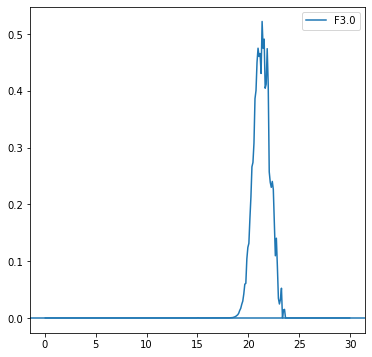

In [30]:
observable_file = "double_well_-3_3.observable.txt"
cv_file = "double_well_-3_3.colvar.txt"
#columns are time nsamples CV AverageForce(t) Force0 ObservableWeight0 Force1 ObservableWeight1 ...
observable_data = np.loadtxt(observable_file)
#cv data, first columns are time, x, y
cv_data = np.loadtxt(cv_file)

n_times, n_columns = observable_data.shape
n_forces = (n_columns - 4)//2

print("Num force points to evaluate observables, set to 41 in plumed file:",n_forces)

#force applied to x in file
x_t = cv_data[:,1]

ims = []
fig, ax=plt.subplots(figsize=(6,6))
x_bins = np.arange(0,30+0.05,0.1)
bin_centers = (x_bins[1:]+x_bins[:-1])/2.0
print(n_forces)
for i in range(n_forces):
    if not i==40: continue
    force_i = observable_data[0,4+2*i]
    force_label = "%.1f"%force_i
    observable_weights = observable_data[:,5+2*i]
    hist, bins = np.histogram(x_t,weights=observable_weights,bins=x_bins,density=True)
    FE = -0.593*np.log(hist)
    FE-=FE.min()
    #plt.plot(bin_centers, FE,label=f"F{force_label}")
    plt.plot(bin_centers, hist,label=f"F{force_label}")

    #hist, bins_x, bins_y = np.histogram2d( x_t, y_t, weights = observable_weights,
    #    range=[[-3,3],[-12,12]],bins=(100,100), density=True)
#note, histogram is transposed in x&y, so this presents the plot orientation as in the paper
    #im = ax.imshow(hist,origin='lower', extent=(-12,12,-3,3), aspect=25./7)
    plt.axhline(0)
plt.legend(loc=0)

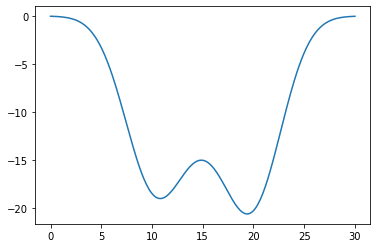

In [27]:
FE_data = np.loadtxt("run_F-2.5/run_metad_F-2.5.grid")
plt.plot(FE_data[:,0],-FE_data[:,1])

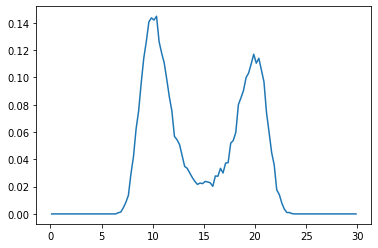

In [29]:
hist, bins = np.histogram(x_t,bins=x_bins,density=True)
plt.plot(bin_centers,hist)